Enter password: ········


<Item title:"San Diego Food Inspectors" type:Web Map owner:navcurator_port>
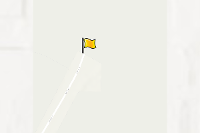

In [2]:
from IPython.core.display import display, HTML
import arcgis
from arcgis.gis import GIS

gis = GIS("https://arcgis.com", "navcurator_port")
sd_food_inspectors_map = gis.content.search("id:31e856c0dac640e18098d688f70c7172")[0]
sd_food_inspectors_map.update()

In [8]:
restaurants_properties = {'title':'Restuarant_Inspections',
                          'tags':'csv, UC2019',
                          'type':'CSV'}
restaurants_csv = gis.content.add(restaurants_properties,
                                  data='./data/Restaurants.csv',
                                  folder='UC2019')
gis.content.update()

restuarants_lyr = restaurants_csv.publish()
restuarants_lyr

<Item title:"Restuarant_Inspections" type:Feature Layer Collection owner:navcurator_port>

In [2]:
breweries_layer = breweries_item.layers[0]
breweries_filter = "location in ('Portland','South Portland','Gorham','Biddeford','Scarborough', 'Topsham','Freeport')"
breweries_df = breweries_layer.query(where=breweries_filter,out_fields="objectid,name,location,url", as_df=True)
breweries_df

,SHAPE,location,name,objectid,url
0,"{""x"": -7842761.363281292, ""y"": 5387249.8882400...",Biddeford,Banded Horn Brewing Company,1,http://www.bandedhorn.com/
1,"{""x"": -7827788.76909877, ""y"": 5419613.40345699...",Portland,Allagash Brewing Company,2,http://www.allagash.com
2,"{""x"": -7827976.476483903, ""y"": 5419540.3176532...",Portland,Austin Street Brewery,9,http://www.austinstreetbrewery.com/
3,"{""x"": -7824695.95439362, ""y"": 5411651.12029272...",Portland,Bissell Brothers,10,http://www.bissellbrothers.com/
4,"{""x"": -7820870.426503916, ""y"": 5414061.9845719...",Portland,Bunker Brewing Co.,11,http://bunkerbrewingco.com/
5,"{""x"": -7824456.296707377, ""y"": 5408829.7723090...",Portland,Fore River Brewing Company,12,http://www.foreriverbrewing.com/
6,"{""x"": -7827960.353021565, ""y"": 5419581.2232304...",Portland,Foundation Brewing Company,13,http://foundationbrew.com/
7,"{""x"": -7827381.402178893, ""y"": 5420339.9204342...",Portland,Geary Brewing Co.,14,http://www.gearybrewing.com/
8,"{""x"": -7820579.243379729, ""y"": 5412405.2793428...",Portland,Gritty’s,15,http://grittys.com/
9,"{""x"": -7820871.380738061, ""y"": 5414439.7813432...",Portland,Gruit,16,http://fermentory.com/


In [3]:
from arcgis.geocoding import geocode
start_location = geocode("100 Commercial Street, Portland, ME", out_sr={"wkid": 102100})[0]["location"]
start_location["spatialReference"] = {"wkid": 102100}
feature = arcgis.features.Feature(
    attributes={
        "ObjectID": 1,
        "Name": "Office"
    },
    geometry=start_location
)
feature_set = arcgis.features.FeatureSet([feature])
feature_collection = arcgis.features.FeatureCollection.from_featureset(feature_set)
start_layer = {"layerDefinition": feature_collection.properties["layers"][0]["layerDefinition"], "featureSet": feature_set.value}

In [4]:
from datetime import datetime
new_route_name = 'routeTEST4'
breweries_layer.filter = breweries_filter
results = arcgis.features.analysis.plan_routes(breweries_layer, # Feature Layer of Stops
                                    6,                          # Number of routes to generate
                                    5,                          # Maximum stops per route
                                    datetime.now(),             # Start time of route
                                    start_layer,                # The dictionary we created to represent the start location
                                    stop_service_time=60,       # How much time in minutes to spend at each stop
                                    max_route_time=480,         # The maximum time for the worker to complete the route
                                    output_name=new_route_name,
                                    include_route_layers=True
                                    )
results

KeyboardInterrupt: 

In [ ]:
routes_layer = results.layers[1]
routes_layer.query(out_fields="OBJECTID,RouteLayerItemID,RouteLayerItemURL,StopCount,TotalStopServiceTime,SHAPE",as_df=True)

In [ ]:
from arcgis.apps import build_navigator_url
query_routes = routes_layer.query(out_fields="OBJECTID,RouteLayerItemID,RouteLayerItemURL,StopCount,TotalStopServiceTime,SHAPE")
for feature in query_routes:
    print(build_navigator_url(url_type='Web',route_item=feature.attributes['RouteLayerItemID']))

In [53]:
from arcgis.apps import build_navigator_url

stops = [("4","4")]
build_navigator_url(stops=)
len([stop for stop in stops if not isinstance(stop, tuple) and not isinstance(stop, str)]) > 0


0

In [14]:
set([1,1])

{1}